Project Phase 03
- Exploring data, data augmentation, data preparation
1. Import your dataset in Jupyter Notebook and store them in a data frame
2. Explore the number of samples and features in your dataset
3. As type of the features effect on your future analysis, please discover the data type of your
features. E.g., integers, float, string.
4. Missing values are the common observations in all datasets. Unfortunately, most AI/ML
algorithms could not handle missing values directly. As a result, it is a good idea to address
these values in the initial steps. Please explore the number of samples with N/A value in
your dataset.
5. It is probable to observe duplicated samples in your data set. As AI/ML algorithms work
based on the inputs’ samples, the duplicated samples can bias our algorithms to the repeated
samples instead of learning the patterns among all samples. So, we should be aware of
duplicated samples in our dataset. Please investigate the number of duplicated samples in
your dataset.
6. We have several options to handle the samples with missing values or duplicated values.
The commonly remove duplicated samples before further analysis. Although we can try
the same strategy for missing values by removing the samples that contain any N/A
features, we sometimes try to fill the missing values by our best estimation strategy. If we
intend to provide an estimation for a value for our predictors, we are using an imputation
strategy. If we try to provide an estimation for the value of our target feature, we will
perform an interpolation strategy. You can find several strategies of imputation and
interpolation using Scikit-learn in [1] and [2], respectively. For the sake of the simplicity,
please remove samples with duplicated values and missing target value. Impute the missing
values of predictor features by mean as described in reference [1].
7. We can explore our data from two perspectives of univariate and bivariate analysis. You
can familiarize yourself with these analysis via [3].
a. Univariate analysis is defined as analysis carried out on only one (“uni”) variable
(“variate”) to summarize or describe the variable [4].
i. Please using describe() method to get the outcomes of descriptive analysis,
including min, max, Q1, and Q2.
ii. You can extend your analysis by plotting histogram and box-plot. These
two plots will help you to discover the underlaying pattern among
distribution of your features. So, you can find weather you are working
with normalized distributions or skewed ones. Also, you can find the outlier
samples, which are deviated from the rest of the samples. We must remove
outliers from our dataset for our further analysis.
b. Bivariate analysis refers to the analysis of two variables to determine relationships
between them [5].
i. You can perform Person correlation and visualize the outcome matrix
using a heatmap to explore the linear relationships among your features.
Remember we are not interested to use features, which provide the same
information for us. You can consider the features with the person values
>0.85 and <-0.85 as linearly correlated features.
ii. You can extend your exploration to non-linear relationships among
features. Pair plot from seaborn module can visualize such relationships in
the presence of target labels.
c. If You are using image dataset, please follow the analysis provide in [6 and 7].
d. Sometimes the number of samples are less than what we expect. We can use data
augmentation techniques to increase the number of samples by generating new
samples by adding noise to original samples, oversampling techniques, or rotating
pictures [8 and 9].

In [1]:
# Import libraries and data
import tensorflow as tf
from tensorflow import keras
import os
import shutil
import zipfile
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Imports dataset and stores it in a data frame

In [2]:
# Install Kaggle
! pip install kaggle

# Download dataset
!kaggle datasets download heesoo37/120-years-of-olympic-history-athletes-and-results

# Extract dataset from zip file
with zipfile.ZipFile('120-years-of-olympic-history-athletes-and-results.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')
df = pd.read_csv('dataset/athlete_events.csv')

Dataset URL: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results
License(s): CC0-1.0
 74% 4.00M/5.43M [00:01<00:00, 5.32MB/s]
100% 5.43M/5.43M [00:01<00:00, 4.99MB/s]


# 2. Explores the number of samples and features in the dataset

In [3]:
# Medal feature transformed from string to int to represent the following:
medal_mapping = {
    None: 0,
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3
    }
# This was necessary because previously, no medal was represented by NaN
# causing 85% of the rows to be dropped from data cleaning in step 6
df['Medal_Encoded'] = df['Medal'].map(medal_mapping)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             271116 non-null  int64  
 1   Name           271116 non-null  object 
 2   Sex            271116 non-null  object 
 3   Age            261642 non-null  float64
 4   Height         210945 non-null  float64
 5   Weight         208241 non-null  float64
 6   Team           271116 non-null  object 
 7   NOC            271116 non-null  object 
 8   Games          271116 non-null  object 
 9   Year           271116 non-null  int64  
 10  Season         271116 non-null  object 
 11  City           271116 non-null  object 
 12  Sport          271116 non-null  object 
 13  Event          271116 non-null  object 
 14  Medal          39783 non-null   object 
 15  Medal_Encoded  39783 non-null   float64
dtypes: float64(4), int64(2), object(10)
memory usage: 33.1+ MB


In [4]:
# Encode 'Team' as a numerical variable
df['Team_encoded'] = LabelEncoder().fit_transform(df['Team'])

# 3. Discovers the data type of our features

In [5]:
print(df.dtypes)

ID                 int64
Name              object
Sex               object
Age              float64
Height           float64
Weight           float64
Team              object
NOC               object
Games             object
Year               int64
Season            object
City              object
Sport             object
Event             object
Medal             object
Medal_Encoded    float64
Team_encoded       int64
dtype: object


# 4. Explores the number of samples with N/A value

In [6]:
df.isnull()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Encoded,Team_encoded
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
271112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
271113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
271114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False


# 5. Identifies duplicated samples

In [7]:
# Identify duplicate rows
duplicates = df[df.duplicated()]

# Display duplicates
print(duplicates)

            ID                                 Name Sex   Age  Height  Weight  \
1252       704                   Dsir Antoine Acket   M  27.0     NaN     NaN   
4282      2449               William Truman Aldrich   M  48.0     NaN     NaN   
4283      2449               William Truman Aldrich   M  48.0     NaN     NaN   
4862      2777               Hermann Reinhard Alker   M  43.0     NaN     NaN   
4864      2777               Hermann Reinhard Alker   M  43.0     NaN     NaN   
...        ...                                  ...  ..   ...     ...     ...   
269994  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269995  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269997  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269999  135073   Doris Clare Zinkeisen (-Johnstone)   F  49.0     NaN     NaN   
270200  135173                     Henri Achille Zo   M  58.0     NaN     NaN   

                 Team  NOC 

# 6. Removes samples with duplicated and missing values

In [11]:
# Removes all N/A values
df = df.dropna()

In [12]:
# Removes any duplicates
df = df.drop_duplicates()

In [13]:
# Proves that no null or duplicated values were present in our dataset
# Output is the same as #2
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30181 entries, 40 to 271103
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             30181 non-null  int64  
 1   Name           30181 non-null  object 
 2   Sex            30181 non-null  object 
 3   Age            30181 non-null  float64
 4   Height         30181 non-null  float64
 5   Weight         30181 non-null  float64
 6   Team           30181 non-null  object 
 7   NOC            30181 non-null  object 
 8   Games          30181 non-null  object 
 9   Year           30181 non-null  int64  
 10  Season         30181 non-null  object 
 11  City           30181 non-null  object 
 12  Sport          30181 non-null  object 
 13  Event          30181 non-null  object 
 14  Medal          30181 non-null  object 
 15  Medal_Encoded  30181 non-null  float64
 16  Team_encoded   30181 non-null  int64  
dtypes: float64(4), int64(3), object(10)
memory usage: 4.1

# 7a. Univariate Analysis

In [ ]:
# Univariate Analysis
df.describe()

,ID,Age,Height,Weight,Year,Medal_Encoded,Team_encoded
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964,2.000630,639.776151
std,38839.720551,5.049684,10.924188,15.004992,22.718451,0.820443,361.369079
min,16.000000,13.000000,136.000000,28.000000,1896.000000,1.000000,4.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000,1.000000,349.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000,2.000000,537.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000,3.000000,977.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000,3.000000,1181.000000


# 7a. Univariate Analysis

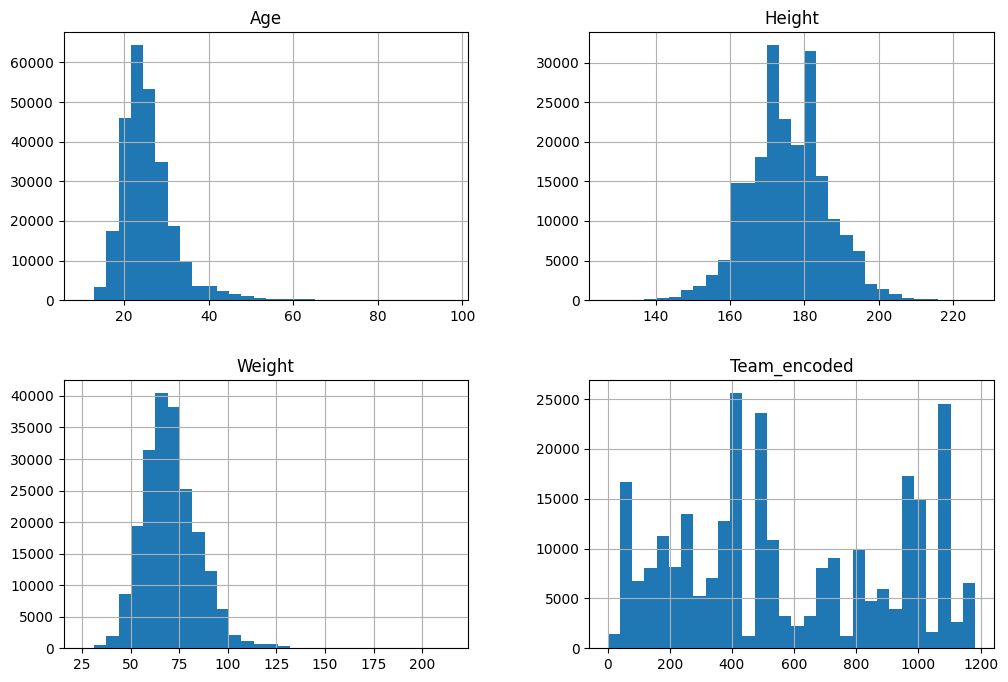

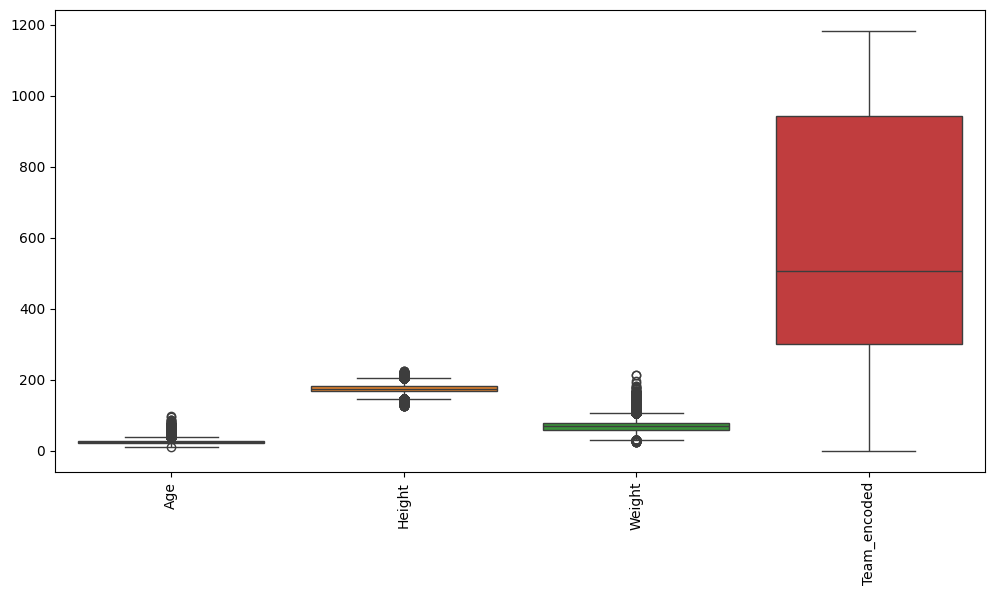

In [ ]:
# Specify the columns you want to use
columns_of_interest = ['Age', 'Height', 'Weight', 'Team_encoded']

# Histogram - Check feature distributions
df[columns_of_interest].hist(figsize=(12, 8), bins=30)
plt.show()

# Box-Plot - Detect Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_of_interest])
plt.xticks(rotation=90)  # Rotate labels if needed
plt.show()

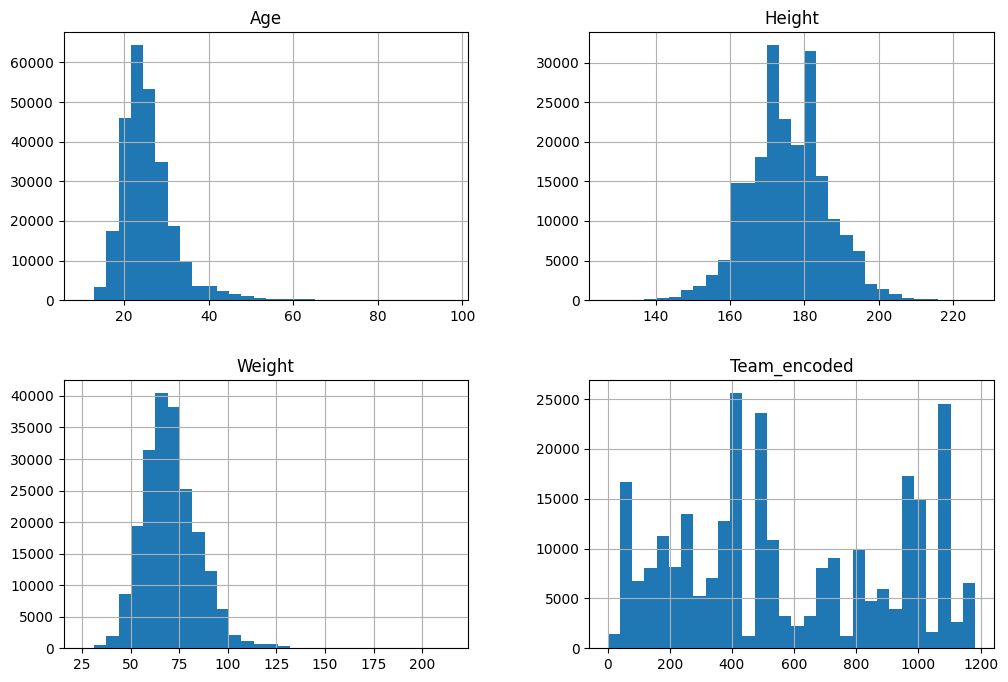

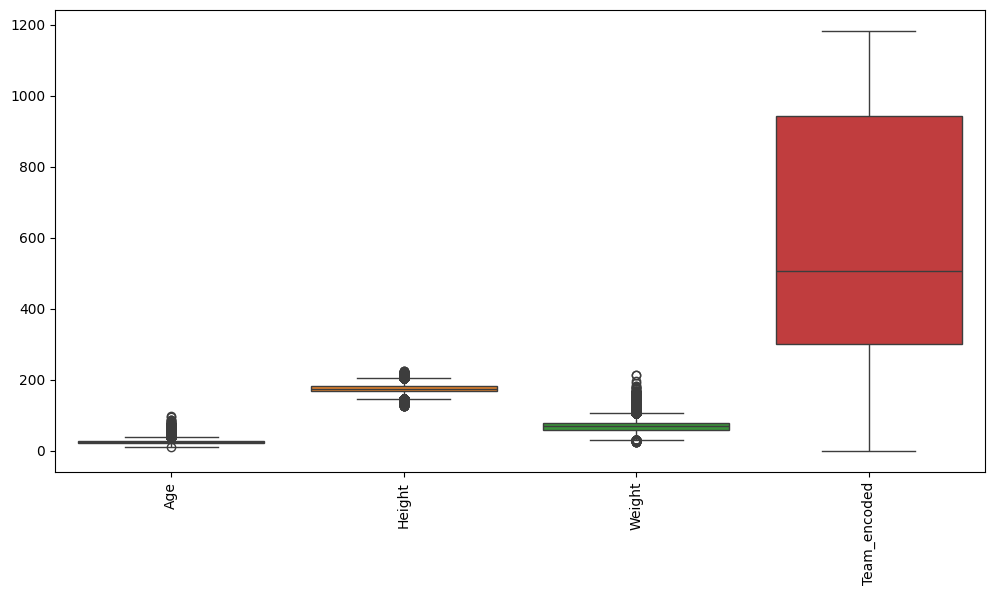

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns you want to use
columns_of_interest = ['Age', 'Height', 'Weight', 'Team_encoded']

# Histogram - Check feature distributions
df[columns_of_interest].hist(figsize=(12, 8), bins=30)
plt.show()

# Box-Plot - Detect Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_of_interest])
plt.xticks(rotation=90)  # Rotate labels if needed
plt.show()

# 7b. Bivariate Analysis

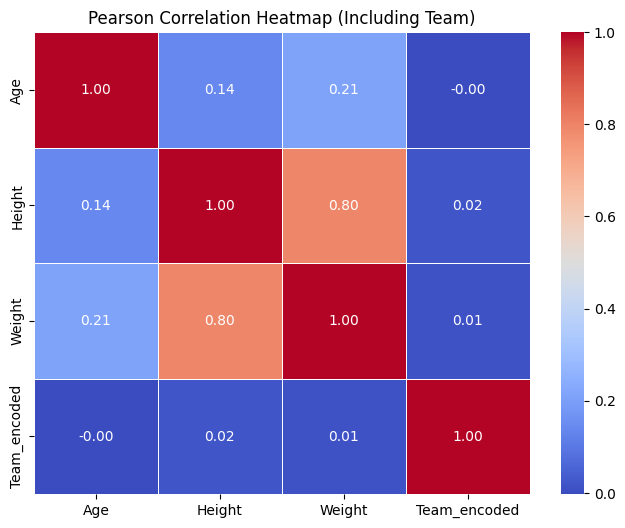

Highly correlated features:
               Age  Height  Weight  Team_encoded
Age           1.0     NaN     NaN           NaN
Height        NaN     1.0     NaN           NaN
Weight        NaN     NaN     1.0           NaN
Team_encoded  NaN     NaN     NaN           1.0


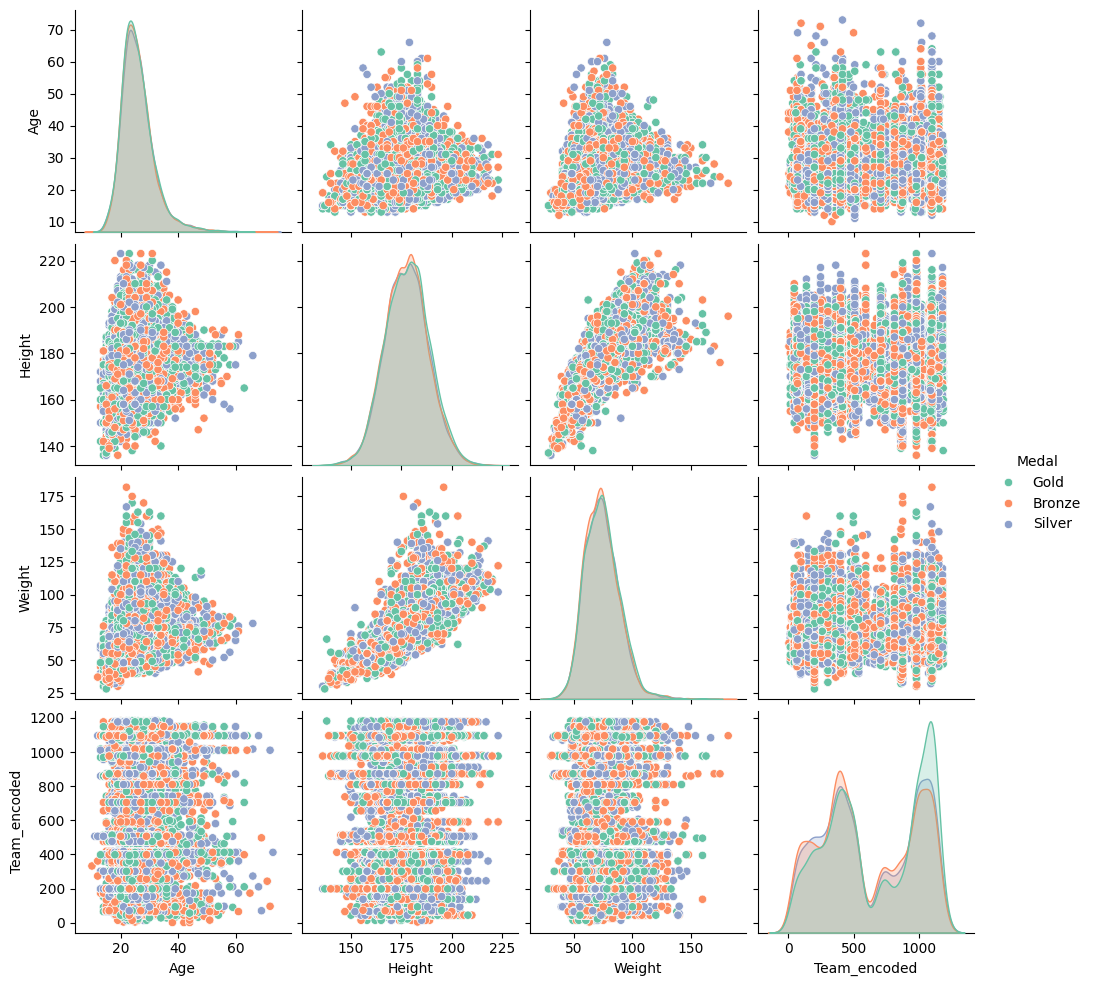

In [ ]:
# Select relevant numerical columns
num_features = ['Age', 'Height', 'Weight']

# Compute Pearson correlation matrix (including Team)
corr_matrix = df[num_features + ['Team_encoded']].corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap (Including Team)")
plt.show()

# Identify highly correlated features (threshold > 0.85 or < -0.85)
high_corr = corr_matrix[(corr_matrix > 0.85) | (corr_matrix < -0.85)]
print("Highly correlated features:\n", high_corr.dropna(how='all').dropna(axis=1, how='all'))

# Pair plot to explore non-linear relationships
sns.pairplot(df[num_features + ['Team_encoded', 'Medal']], hue='Medal', diag_kind='kde', palette='Set2')
plt.show()